In [297]:
import numpy as np
import imageio
import glob
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [298]:
def load_mnist():
    # Loads the MNIST dataset from png images
 
    NUM_LABELS = 10        
    # create list of image objects
    test_images = []
    test_labels = []    
    
    for label in range(NUM_LABELS):
        for image_path in glob.glob("MNIST/Test/" + str(label) + "/*.png"):
            image = imageio.imread(image_path)
            test_images.append(image)
            letter = [0 for _ in range(0,NUM_LABELS)]    
            letter[label] = 1
            test_labels.append(letter)  
            
    # create list of image objects
    train_images = []
    train_labels = []    
    
    for label in range(NUM_LABELS):
        for image_path in glob.glob("MNIST/Train/" + str(label) + "/*.png"):
            image = imageio.imread(image_path)
            train_images.append(image)
            letter = [0 for _ in range(0,NUM_LABELS)]    
            letter[label] = 1
            train_labels.append(letter)                  
            
    X_train= np.array(train_images).reshape(-1,784)/255.0
    Y_train= np.array(train_labels)
    X_test= np.array(test_images).reshape(-1,784)/255.0
    Y_test= np.array(test_labels)
    
    return X_train, Y_train, X_test, Y_test

# Dense layer (fully connected)

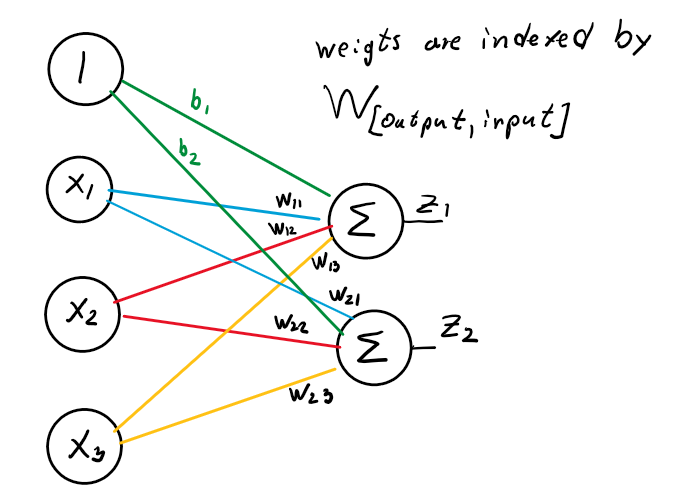

For a whole batch the input matrix $X$ is one sample per row $X_{sample, feature}$
 
\begin{equation}  
\begin{bmatrix} x_{11} & x_{12} & x_{13} \\ x_{21} & x_{22} & x_{23} \end{bmatrix}
\end{equation}

The weight matrix $w$ is transposed to have one output neuron per column $w_{output, input}$
 
\begin{equation}  
\begin{bmatrix} w_{11} & w_{21} \\ w_{12} & w_{21} \\ w_{13} & w_{23} \end{bmatrix}
\end{equation}

## Forward function
The outputs $z$ is calculated in the forward function with matrix multiplication as 
 
$$X*w+b = z$$

Each row of z corresponds to one sample, the number of rows is equal to the batch size


\begin{equation} 
\begin{bmatrix} x_{11} & x_{12} & x_{13} \\ x_{21} & x_{22} & x_{23} \end{bmatrix}
\begin{bmatrix} w_{11} & w_{21} \\ w_{12} & w_{21} \\ w_{13} & w_{23} \end{bmatrix} + 
\begin{bmatrix} b_1 & b_2 \\ b_1 & b_2 \end{bmatrix} = 
\begin{bmatrix} x_{11}w_{11}+x_{12}w_{12}+x_{13}w_{13} + b_1
                & x_{11}w_{21}+x_{12}w_{22}+x_{13}w_{23} + b_2 \\
                  x_{21}w_{11}+x_{22}w_{12}+x_{23}w_{13} + b_1
                & x_{21}w_{21}+x_{22}w_{22}+x_{23}w_{23} + b_2 
\end{bmatrix} \\
\text{= np.dot(inputs, self.weights) + self.biases}
\end{equation}

## Backward function

#### The derivative the weights respect the cost function 

$$ \frac{\delta J}{\delta w_i} = \frac{\delta J}{\delta z_i} \frac{\delta z_i}{\delta w_{ij}}  = \frac{\delta J}{\delta z_i}  X_j$$

where $\frac{\delta J}{\delta z_i}$ is the gradient that is comming from the right

And the derivative of a weight $w$ respect to the $z$ $\frac{\delta z_i}{\delta w_{ij}}$  is just the corresponding $X$ to that weight


\begin{equation} 
\frac{\delta J}{\delta w_i} = X^T \frac{\delta J}{\delta z_i}
\end{equation}

\begin{equation}
\begin{bmatrix} x_{11} & x_{12} & x_{13} \\ x_{21} & x_{22} & x_{23}  \end{bmatrix} ^T
\begin{bmatrix} dz_{11} & dz_{12} \\ dz_{21} & dz_{22} \\ dz_{31} & dz_{32} \end{bmatrix} =
\begin{bmatrix} x_{11}dz_{11}+x_{21}dz_{21}
                & x_{11}dz_{12}+x_{12}dz_{22} \\
                  x_{12}dz_{11}+x_{12}dz_{12}
                & x_{12}dz_{12}+x_{22}dz_{22} 
\end{bmatrix} \\
\text{= np.dot(self.inputs.T, d_outputs)}
\end{equation}

#### The derivative of the biases respect the cost function 

$$ \frac{\delta J}{\delta b} = \frac{\delta J}{\delta z_i}  \frac{\delta z_i}{\delta b}  = \frac{\delta J}{\delta z_i}  1$$

where $\frac{\delta J}{\delta z_i}$ is the gradient that is comming from the right

And the derivative of a weight $b$ respect to the $z$ $\frac{\delta z_i}{\delta w_{ij}}$  is just 1

\begin{equation}
\begin{bmatrix} 1 & 1 \end{bmatrix} 
\begin{bmatrix} dz_{11} & dz_{12} \\ dz_{21} & dz_{22}\end{bmatrix} =
\begin{bmatrix} dz_{11}+dz_{21} & dz_{12}dz_{22}\end{bmatrix} \\
\text{= np.sum(d_outputs, axis=0)}
\end{equation}

In the code: d_outputs = $\frac{\delta J}{\delta z_i}$

          inputs = X

In [299]:
class Dense_Layer:
    def __init__(self, n_inputs, n_outputs):
        self.weights = 0.01 * np.random.randn(n_inputs,n_outputs) #rand
        self.biases = np.zeros((1, n_outputs))
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases # b is added to each row (broadcasting)
    def backward(self, d_outputs):
        self.dweights = np.dot(self.inputs.T, d_outputs)
        self.dbiases = np.sum(d_outputs, axis=0, keepdims=True)
        self.d_inputs = np.dot(d_outputs, self.weights.T) 

# ReLU Activation

### Forward 

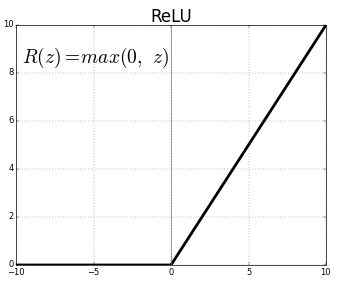

### Backward

The drivative of the ReLU is 0 if the input was less then 0:   $\text{self.d_inputs[self.inputs <= 0] = 0}$

else it's just 1 (the same as the output):  $\text{self.d_inputs = d_outputs.copy()}$

In [300]:
class ReLU_Activation:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0,inputs)
    def backward(self, d_outputs):
        self.d_inputs = d_outputs.copy()
        self.d_inputs[self.inputs <= 0] = 0

# Sigmoid Activation

### Forward 

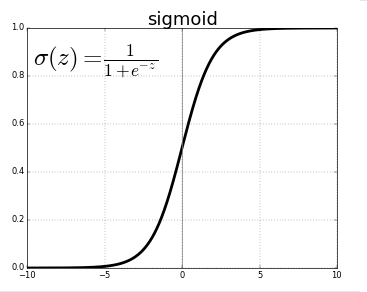

### Backward

The derivative of the sigmoid is $$\frac{d\sigma}{dx} = \sigma(x)(1-\sigma(x))$$

The derivative with respect to the cost function:
$$ \frac{\delta J}{\delta x} = \frac{\delta J}{\delta \sigma}  \frac{d\sigma}{dx} = \frac{\delta J}{\delta \sigma} \sigma(x)(1-\sigma(x))$$

in the code $\frac{\delta J}{\delta \sigma}$ =  d_outputs

$$\text{self.d_inputs = d_outputs * (1 - self.output) * self.output}$$

In [301]:
class Sigmoid_Activation:
    # Forward pass
    def forward(self, inputs):
        # Save input and calculate/save output
        # of the sigmoid function
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))
        # Backward pass
    def backward(self, d_outputs):
        # Derivative - calculates from output of the sigmoid function
        self.d_inputs = d_outputs * (1 - self.output) * self.output

# Softmax activation
### Forward

The softmax activation is to make the outputs into probilities between 0 and 1. The Sum of the probablities is also 1. 

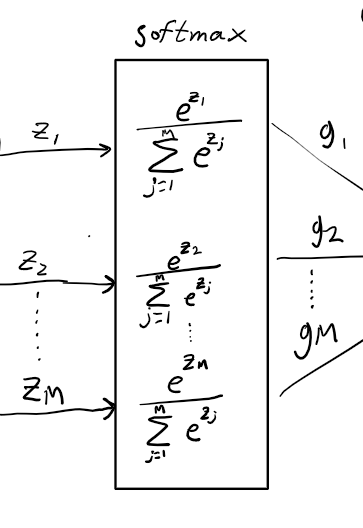

In [302]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) # minus det största värdet för numerical stability
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities     

# Cross-entropy loss (log loss)

### Forward

$$ L =  -ln(g_y)$$ 

where $g_y$ is the softmax output for the prediction value of the true label

Cross entropy loss is used to get smooth curve with a high loss for a bad prediction.

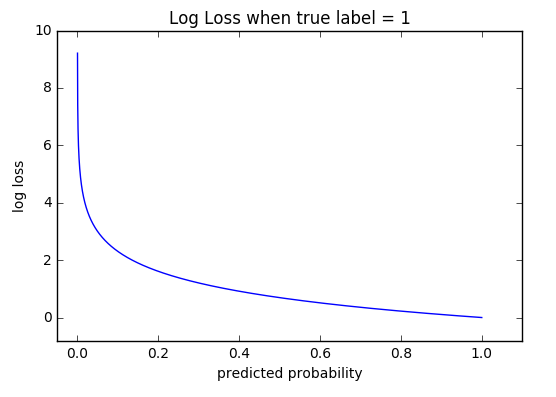

In [303]:
class Crossentropy_Loss:      
    def forward(self, y_pred, y_true):
                
        # Number of samples in a batch
        samples = len(y_pred)
        prob_for_true = y_pred[range(samples),y_true]
        
        # Losses
        negative_log_likelihoods = -np.log(prob_for_true)
        return negative_log_likelihoods

    def batch_loss(self, output, y):
        # Calculate sample losses
        sample_losses = self.forward(output, y)
        # Calculate mean loss
        batch_loss = np.mean(sample_losses)
        # Return loss
        return batch_loss

# Combined Softmax and cross-entropy loss derivation

together they form a much simpler derivative that is faster to compute

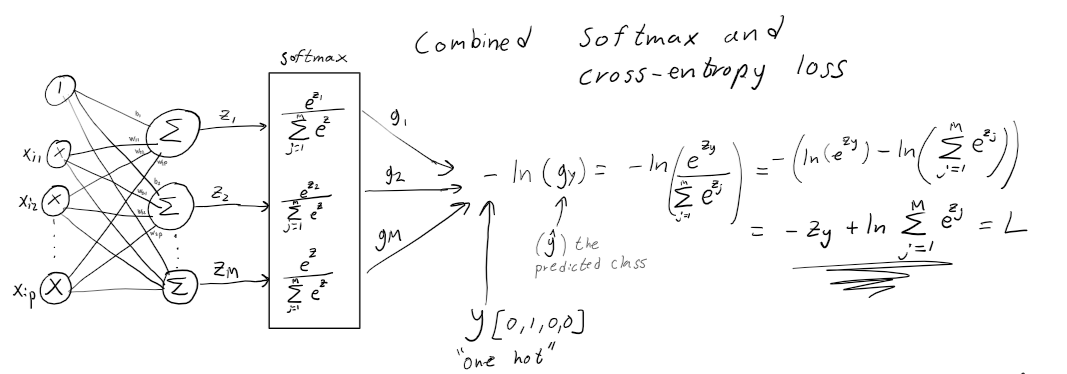

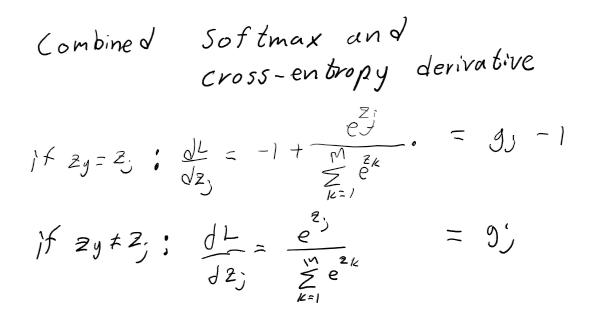

In [304]:
class Activation_Softmax_Loss_CategoricalCrossentropy:    
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Crossentropy_Loss()
        # Forward pass
    def forward(self, inputs, y_true):
        # Output layer’s activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.batch_loss(self.output, y_true)

    def backward(self, d_outputs, y_true):
        # Number of samples
        samples = len(d_outputs)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.d_inputs = d_outputs.copy()
        
        # Calculate gradient
        self.d_inputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.d_inputs = self.d_inputs / samples

In [305]:
# SGD optimizer
class Optimizer_SGD:
    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=0.5):
        self.learning_rate = learning_rate
        # Update parameters
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases

# Load the data

In [306]:
# Load dataset
X_train, Y_train, X_test, Y_test = load_mnist()

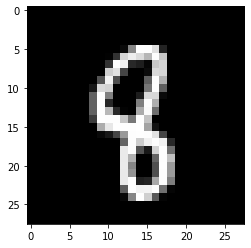

In [307]:
#look at one example
img = X_test[8500].reshape(28, 28)
imgplot = plt.imshow(img, cmap='gray')

In [308]:
# one hot encoding to values
Y_test= np.argmax(Y_test, axis=1)
Y_train = np.argmax(Y_train, axis=1)

#shuffle the data (for making good mini-batches)
X_train, Y_train = shuffle(X_train, Y_train)

# Create and train the model

epoch: 0, train acc: 0.906, test acc: 0.888, train loss: 0.444, test loss: 0.478
epoch: 1, train acc: 0.927, test acc: 0.900, train loss: 0.327, test loss: 0.392
epoch: 2, train acc: 0.938, test acc: 0.907, train loss: 0.274, test loss: 0.355
epoch: 3, train acc: 0.948, test acc: 0.912, train loss: 0.242, test loss: 0.333
epoch: 4, train acc: 0.958, test acc: 0.915, train loss: 0.220, test loss: 0.318
epoch: 5, train acc: 0.979, test acc: 0.916, train loss: 0.204, test loss: 0.307
epoch: 6, train acc: 0.969, test acc: 0.918, train loss: 0.192, test loss: 0.297
epoch: 7, train acc: 0.969, test acc: 0.920, train loss: 0.181, test loss: 0.289
epoch: 8, train acc: 0.969, test acc: 0.923, train loss: 0.172, test loss: 0.282
epoch: 9, train acc: 0.969, test acc: 0.925, train loss: 0.165, test loss: 0.276
epoch: 10, train acc: 0.969, test acc: 0.927, train loss: 0.158, test loss: 0.271
epoch: 11, train acc: 0.969, test acc: 0.927, train loss: 0.152, test loss: 0.266
epoch: 12, train acc: 0.96

<function matplotlib.pyplot.show>

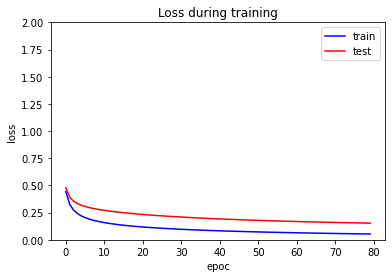

In [337]:
# Create Dense layer with 784 input features and 10 output values

dense1 = Dense_Layer(784, 500)
activation1 = ReLU_Activation()

dense2 = Dense_Layer(500, 10)

loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_SGD(learning_rate=1.8)

EPOCHS = 80
BATCH_SIZE = 256 # We take 256 samples at once

#save losses in a list
training_loss_array = np.zeros(EPOCHS)
test_loss_array = np.zeros(EPOCHS)

# Calculate number of steps
steps = X_train.shape[0] // BATCH_SIZE
# Dividing rounds down. If there are some remaining data,
# but not a full batch, this won't include it.
# Add 1 to include the remaining samples in 1 more step.
if steps * BATCH_SIZE < X_train.shape[0]:
    steps += 1

# Train in loop
for epoch in range(EPOCHS):
    for step in range(steps):
        batch_X = X_train[step*BATCH_SIZE:(step+1)*BATCH_SIZE]
        batch_y = Y_train[step*BATCH_SIZE:(step+1)*BATCH_SIZE]

        dense1.forward(batch_X)
        activation1.forward(dense1.output)
        dense2.forward(activation1.output)

        loss = loss_activation.forward(dense2.output, batch_y)
        
        predictions = np.argmax(loss_activation.output, axis=1)
        accuracy = np.mean(predictions == batch_y)

        # Backward pass
        loss_activation.backward(loss_activation.output, batch_y)
        dense2.backward(loss_activation.d_inputs)        
        activation1.backward(dense2.d_inputs)
        dense1.backward(activation1.d_inputs)   
        optimizer.update_params(dense1)
        
    ###test###
    dense1.forward(X_test)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    test_loss = loss_activation.forward(dense2.output, Y_test)    
    predictions = np.argmax(loss_activation.output, axis=1)
    test_accuracy = np.mean(predictions == Y_test)
    ##########
    
    print(f'epoch: {epoch}, ' +
    f'train acc: {accuracy:.3f}, ' + 
    f'test acc: {test_accuracy:.3f}, ' +
    f'train loss: {loss:.3f}, ' +
    f'test loss: {test_loss:.3f}')
    
    training_loss_array[epoch] = loss
    test_loss_array[epoch] = test_loss

plt.plot(training_loss_array, "-b", label="train")
plt.plot(test_loss_array, "-r", label="test")
plt.legend(loc="upper right")
plt.xlabel('epoc')
plt.ylabel('loss')
plt.title('Loss during training')
plt.ylim([0, 1])
plt.show

# Plot the weights matrixes

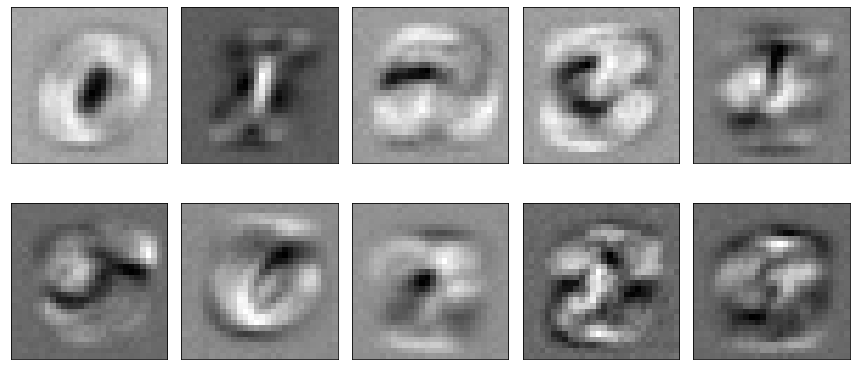

In [312]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
i = 0
for ax in axs.flat:
    ax.imshow(dense1.weights.T[i].reshape(28, 28), cmap='gray')
    i += 1
plt.tight_layout()
plt.show()